<a href="https://colab.research.google.com/github/yekini9908/MP/blob/master/DATA49_%EB%89%B4_%EB%85%B8%EB%A9%80_%EC%8B%9C%EB%8C%80%2C_%EC%8A%A4%ED%8F%AC%EC%B8%A0_%EC%88%98%EC%9A%94%EC%99%80_%EC%8B%A0%EC%82%B0%EC%97%85_%ED%94%84%EB%A1%9C%EC%8A%A4%ED%8F%AC%EC%B8%A0%EA%B4%80%EC%A4%91%ED%86%B5%EA%B3%84_%EB%B6%84%EC%84%9D%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 연결


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Library

In [ ]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc

# Load Dataset


In [ ]:
df = pd.read_csv(
    "/content/drive/Shareddrives/2021 여름방학 프로젝트/데이터/스포츠관중 통계/crowd_data_final2.csv")
df

,요일,날씨,평균기온,관중수,확진자 수,수용인원,비율,날짜,관심도
0,금,비,12.4,21121,0,26986,0.782665,2017-03-31,81.38457
1,토,비,15.1,20636,0,26986,0.764693,2017-04-01,45.14028
2,일,맑음,15.8,22457,0,26986,0.832172,2017-04-02,36.07153
3,화,구름조금,21.8,16411,0,26986,0.608130,2017-04-04,33.59904
4,목,비,12.4,12166,0,26986,0.450826,2017-04-06,29.84604
...,...,...,...,...,...,...,...,...,...
525,금,구름조금,29.5,3558,263,8100,0.439259,2021-06-25,30.48119
526,토,비,26.7,5297,242,8100,0.653951,2021-06-26,45.03403
527,수,비,28.8,2851,334,8100,0.351975,2021-06-30,36.88712
528,목,맑음,31.0,2919,346,8100,0.360370,2021-07-01,29.18606


## 데이터 전처리

### Label Encoding


In [ ]:
labelEncoder = LabelEncoder()
df["요일"] = labelEncoder.fit_transform(df["요일"])
df["날씨"] = labelEncoder.fit_transform(df["날씨"])
df

,요일,날씨,평균기온,관중수,확진자 수,수용인원,비율,날짜,관심도
0,0,3,12.4,21121,0,26986,0.782665,2017-03-31,81.38457
1,5,3,15.1,20636,0,26986,0.764693,2017-04-01,45.14028
2,4,2,15.8,22457,0,26986,0.832172,2017-04-02,36.07153
3,6,1,21.8,16411,0,26986,0.608130,2017-04-04,33.59904
4,1,3,12.4,12166,0,26986,0.450826,2017-04-06,29.84604
...,...,...,...,...,...,...,...,...,...
525,0,1,29.5,3558,263,8100,0.439259,2021-06-25,30.48119
526,5,3,26.7,5297,242,8100,0.653951,2021-06-26,45.03403
527,2,3,28.8,2851,334,8100,0.351975,2021-06-30,36.88712
528,1,2,31.0,2919,346,8100,0.360370,2021-07-01,29.18606


### Scaling

In [ ]:
scaler = preprocessing.MinMaxScaler()
scale_cols = ['요일', '날씨', '평균기온', '확진자 수', '비율', '관심도']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled

,요일,날씨,평균기온,확진자 수,비율,관심도
0,0.000000,0.75,0.141956,0.000000,0.810371,0.784726
1,0.833333,0.75,0.227129,0.000000,0.786661,0.365588
2,0.666667,0.50,0.249211,0.000000,0.875683,0.260715
3,1.000000,0.25,0.438486,0.000000,0.580117,0.232122
4,0.166667,0.75,0.141956,0.000000,0.372595,0.188722
...,...,...,...,...,...,...
525,0.000000,0.25,0.681388,0.734637,0.357335,0.196067
526,0.833333,0.75,0.593060,0.675978,0.640565,0.364359
527,0.333333,0.75,0.659306,0.932961,0.242187,0.270146
528,0.166667,0.50,0.728707,0.966480,0.253262,0.181089


## 데이터 학습

### Training & Test Set 분리

In [ ]:
WINDOW_SIZE = 5

train = df_scaled
test = df_scaled[300:500]

In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(numpy.array(data.iloc[i:i+window_size]))
        label_list.append(numpy.array(label.iloc[i+window_size]))
    return numpy.array(feature_list), numpy.array(label_list)

In [ ]:
feature_cols = ['요일', '날씨', '평균기온', '확진자 수', '관심도']
label_cols = ['비율']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)
train_feature.shape, train_label.shape

((510, 20, 5), (510, 1))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 5), (180, 1))

### Hold out

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size=0.1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((459, 20, 5), (51, 20, 5), (459, 1), (51, 1))

## 모델 생성

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(32, input_shape=(
    train_feature.shape[1], train_feature.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(
    filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
230/230 [==============================] - 21s 11ms/step - loss: 0.1389 - val_loss: 0.0723

Epoch 00001: val_loss improved from inf to 0.07234, saving model to model/tmp_checkpoint.h5
Epoch 2/200
230/230 [==============================] - 2s 8ms/step - loss: 0.0916 - val_loss: 0.0774

Epoch 00002: val_loss did not improve from 0.07234
Epoch 3/200
230/230 [==============================] - 2s 8ms/step - loss: 0.0778 - val_loss: 0.0616

Epoch 00003: val_loss improved from 0.07234 to 0.06158, saving model to model/tmp_checkpoint.h5
Epoch 4/200
230/230 [==============================] - 2s 8ms/step - loss: 0.0770 - val_loss: 0.0653

Epoch 00004: val_loss did not improve from 0.06158
Epoch 5/200
230/230 [==============================] - 2s 8ms/step - loss: 0.0697 - val_loss: 0.0605

Epoch 00005: val_loss improved from 0.06158 to 0.06053, saving model to model/tmp_checkpoint.h5
Epoch 6/200
230/230 [==============================] - 2s 8ms/step - loss: 0.0723 - val_loss: 0.0587



### 모델 테스트

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

### 모델 테스트 결과

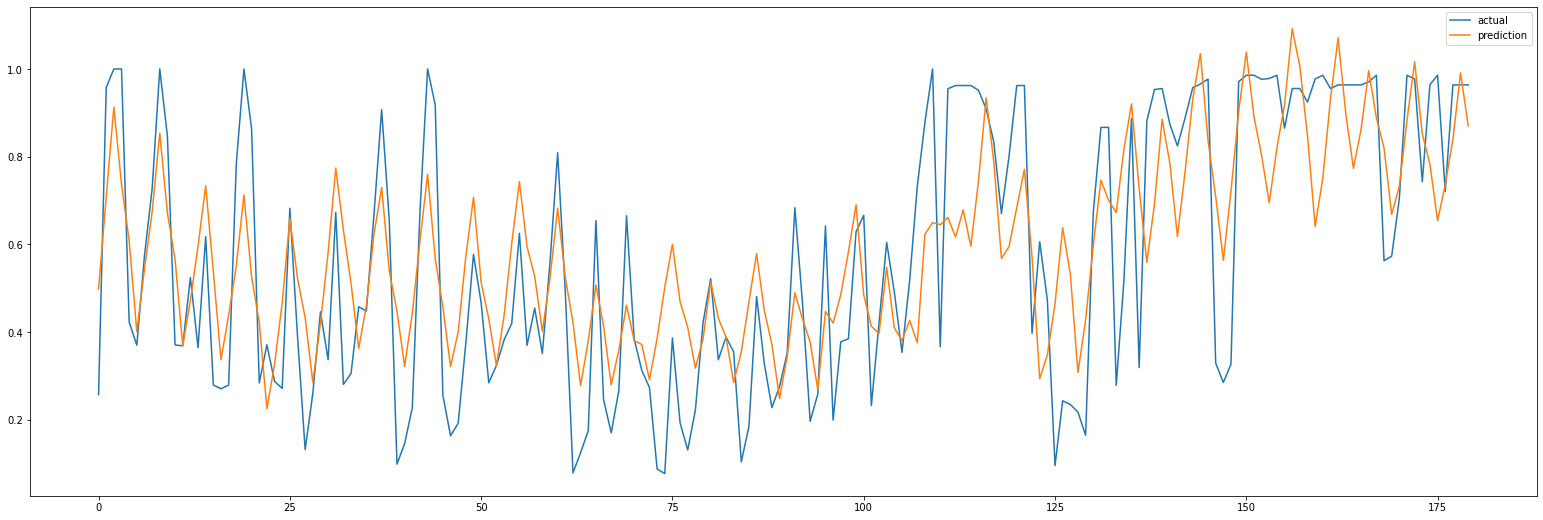

In [ ]:
plt.figure(figsize=(27, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

# Load Prediction Testset

In [ ]:
testset = pd.read_csv(
    "/content/drive/Shareddrives/2021 여름방학 프로젝트/데이터/스포츠관중 통계/testSet_2022.csv")

## 데이터 전처리

### Label Encoding

In [ ]:
labelEncoder = LabelEncoder()
testset["요일"] = labelEncoder.fit_transform(testset["요일"])
testset["날씨"] = labelEncoder.fit_transform(testset["날씨"])
testset.head()

,날짜,요일,평균기온,관심도,날씨,확진자수
0,2022-03-31,1,13.633333,53.100057,1,294
1,2022-04-07,1,17.466667,33.377563,1,278
2,2022-04-12,3,18.133333,32.866690,2,250
3,2022-04-13,2,18.933333,35.443857,4,140
4,2022-04-14,1,15.366667,33.787550,3,130


## 모델 Input Shape에 맞게 testset 변형

In [ ]:
def make_testset(data, window_size=0):
    feature_list = []
    for i in range(len(data) - window_size):
        feature_list.append(numpy.array(data.iloc[i:i+window_size]))
    return numpy.array(feature_list)

In [ ]:
feature_cols = ['요일', '날씨', '평균기온', '확진자수', '관심도']

test_feature = testset[feature_cols]

test_feature = make_testset(test_feature, 1)

test_feature.shape

(50, 1, 5)

## 결과

### 테스트셋 예측

In [ ]:
pred = model.predict(test_feature)

### 예측 결과

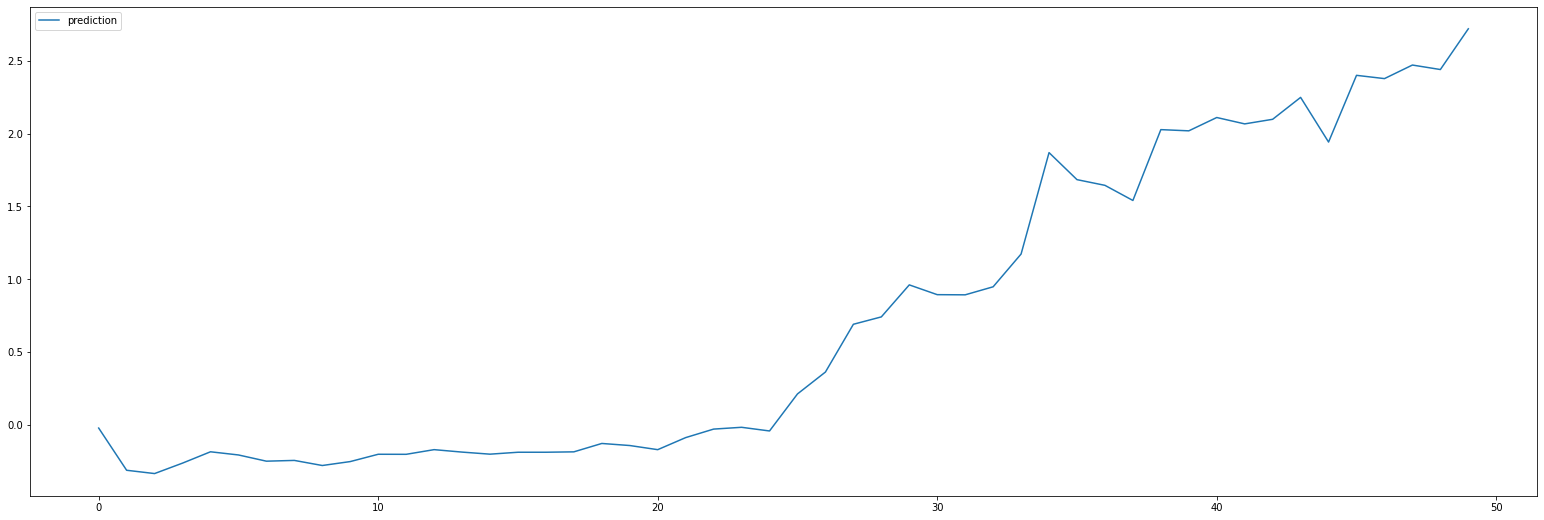

In [ ]:
plt.figure(figsize=(27, 9))
plt.plot(pred, label='prediction')
plt.legend()
plt.show()